# 1. Fixed-point iteration

Rewrite $f(x) = 0$ as $x = \phi(x)$ so that
$$f(x_*) = 0 \Leftrightarrow x_* = \phi(x_*),$$
where $x_*$ is the root of the first equation.

The simplest way of costructing $\phi(x)$ is
$$\phi(x) = x - \alpha f(x).$$

The iterative process
$$x_{n+1} = \phi(x_{n})$$
converges to the root $x_*$ if $\lim\limits_{n \rightarrow} x_n = x_*$.

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$ in the form

$$
\phi(x) = x - \alpha f(x),
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$ (visualize this dependence for three different values of $epsilon$). Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval (highlight it on the plot).

In [ ]:
# ... ENTER YOUR CODE HERE ...

Find the solution (and number of iterations) of the equation above using fixed-point iteration for $\alpha = 1$ and $\epsilon = 0.001$ (for Google form).

In [ ]:
# ... ENTER YOUR CODE HERE ...

# 2. Inverse quadratic interpolation

Suppose we have three different consequitive iterates $x_0$, $x_1$ and $x_2$ and a function $f(x)$: $y_i = f(x_i)$.

Construct a unique parabola which passes through $(x_i, y_i)$. Take as a next approximation, $x_3$, the root of this parabola.

In order not to solve another nonlinear equation on each step, use an inverse interpolation: construct a second order polynomial $Q(y)$ such that $Q(y_i) = x_i$. Then $x_3 = Q(0)$.

Now, write a function which finds the solution using inverse quadratic interpolation up to a predefined accuracy $\epsilon$.

In [9]:
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
plt.xkcd()
def inv_quad_interpolation(func, point_0, point_1, point_2, eps):
    it = 0
    xn3 = 0
    xn2 = point_2
    xn1 = point_1
    xn0 = point_0
    while 1:
        xn3 = func(xn1)*func(xn0)/((func(xn2) - func(xn1))*(func(xn2) - func(xn0)))*xn2 
        xn3 = xn3 + func(xn2)*func(xn0)/((func(xn1) - func(xn2))*(func(xn1) - func(xn0)))*xn1
        xn3 = xn3 +func(xn1)*func(xn2)/((func(xn0) - func(xn1))*(func(xn0) - func(xn2)))*xn0
        temp = xn2
        it += 1
        xn0 = xn1
        xn1 = xn2
        xn2 = xn3
        if abs(xn2 - xn1) < eps:
            break
    return xn0, xn1, xn2, it

In [3]:
def f(x):
    return 1/np.tan(x)

Now implement your function to solve equation
$$x = \mbox{ctg}(x)$$
in the interval $x \in (0.5, 1)$ with $x_0 = 0.6$, $x_1 = 0.8$ and $x_2 = 1$. What is the solution for $\epsilon = 0.001$? How many iterations did it take to find it? (You will need the answers for Google Form).

In [6]:
x = np.linspace(0.5,2, endpoint = False)
#func = dict(zip(x,f))
pnts = inv_quad_interpolation(f, 0.6, 0.8, 0.99, 0.001)

In [7]:
pnts # минимальное число итераций - 4, ответ сходится к 1.571

(1.5729661481390687, 1.5707850316846517, 1.5707963265497369, 4)

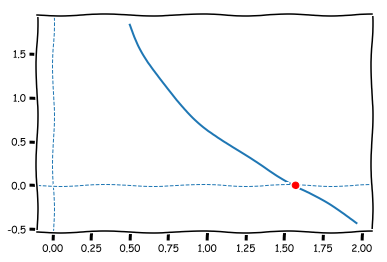

In [10]:
xx = x
yy = f(xx)
plt.plot(xx,yy)
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.plot(pnts[0],f(pnts[0]), "ro")

# 3. Newton-Raphson method

Implement the Newton-Raphson method to solve equation $z^3 - 1 = 0$ for complex $z$. Visualize and describe the convergence domain.

In [8]:
def f(z):
    return z**3-1

In [9]:
def fprime(z):
    return 3*z**2

In [6]:
from math import sin, cos
from typing import Callable
import unittest


def newton(f: Callable[[float], float], f_prime: Callable[[float], float], x0: float, eps: float=1e-7, kmax: int=1e3) -> float:
    
    x, x_prev, i = x0, x0 + 2 * eps, 0

    while abs(x - x_prev) >= eps and i < kmax:
        x, x_prev, i = x - f(x) / f_prime(x), x, i + 1

    return x


In [ ]:
newton(f, )

Hint: visualize the convergence domain as a scatter plot of coloured points (the colour of the point depends on the root it converged to).